In [143]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Çalışacağımız sayılar 0,1,2,3,4,5
1. 0 = [204,408]
1. 1 = [822,1027]
1. 2 = [1649,1854]
1. 3 = [1443,1648]
1. 4 = [1236,1442]
1. 5 = [1855,2061]
1. 6 = [615,821]
1. 7 = [409,614]
1. 8 = [1028,1235]
1. 9 = [0,203]

(-0.5, 63.5, 63.5, -0.5)

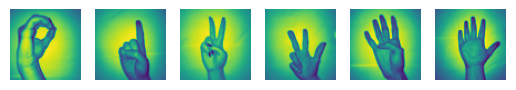

In [144]:
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')
img_size = 64

plt.subplot(1, 6, 1) 
plt.imshow(x_l[204].reshape(img_size, img_size))
plt.axis('off')
# 0. sayı 
plt.subplot(1, 6, 2)
plt.imshow(x_l[822].reshape(img_size, img_size))
plt.axis('off')
# 1. sayı
plt.subplot(1, 6, 3)
plt.imshow(x_l[1659].reshape(img_size, img_size))
plt.axis('off')
# 2. sayı
plt.subplot(1, 6, 4)
plt.imshow(x_l[1443].reshape(img_size, img_size))
plt.axis('off')
# 3. sayı
plt.subplot(1, 6, 5)
plt.imshow(x_l[1236].reshape(img_size, img_size))
plt.axis('off')
# 4. sayı
plt.subplot(1, 6, 6)
plt.imshow(x_l[1855].reshape(img_size, img_size))
plt.axis('off')
# 5. sayı

In [145]:
X = np.delete(x_l,((615,821),(409,614),(1028,1235),(0,203)),0) 

z = np.zeros(1027)
o = np.ones(1027)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)


X shape:  (2054, 64, 64)
Y shape:  (2054, 1)


(-0.5, 63.5, 63.5, -0.5)

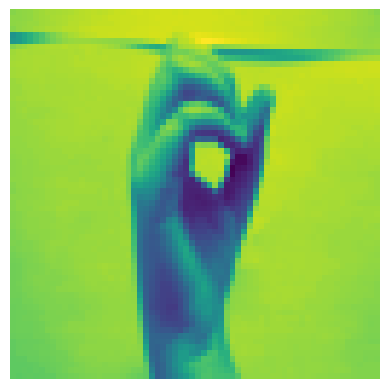

In [146]:
img_size = 64

plt.subplot(1, 1, 1) 
plt.imshow(X[204].reshape(img_size, img_size))
plt.axis('off')

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]


In [148]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)


X train flatten (1643, 4096)
X test flatten (411, 4096)


In [149]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


x train:  (4096, 1643)
x test:  (4096, 411)
y train:  (1, 1643)
y test:  (1, 411)


In [150]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.7396593673965937 
train accuracy: 0.9379184418746196 


In [151]:
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [160]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    # dense hiden layer oluştur demek units = 8 8 tane node oluşacak 
    # kernel_initializer = 'uniform' weightlerin ilk ağırlıkları uniform ise random olduğunu söyler
    # activation = 'relu' aktivasyon fonksiyonu olarak relu kullanıyoruz
    # input_dim = x_train.shape[1]) input sayılarım 
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    # compile derliyoruz loss = 'binary_crossentropy' loss hesaplıyoruz
    # optimizer = 'adam' metrics = ['accuracy'] doğruluk değerimiz 
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))


Epoch 1/100
35/35 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4831
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5068
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 8/100
35/35 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 10/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5068
Epoch 11/

35/35 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.7900
Epoch 64/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.7763
Epoch 65/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.7900
Epoch 66/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 0.8000
Epoch 67/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7900
Epoch 68/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4708 - accuracy: 0.7854
Epoch 69/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4619 - accuracy: 0.8009
Epoch 70/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4690 - accuracy: 0.7927
Epoch 71/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.8018
Epoch 72/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4851 - accuracy: 0.7753
Epoch 73/100


In [157]:
#Accuracy mean: 0.5611219306786855
#Accuracy variance: 0.11556444183193314

#Accuracy mean: 0.5039443075656891
#Accuracy variance: 0.016840423049435383

sparse_categorical_crossentropy
categorical_crossentropy

In [161]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
cce = tf.keras.losses.CategoricalCrossentropy()

In [ ]:
cce(y_test, y_pred).numpy()